## Density Estimation for a mixture of Gaussians
Source: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

In [2]:
n_samples = 300

In [3]:
np.random.seed(0)

In [4]:
# generate spherican data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20,20])

In [6]:
# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

In [7]:
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

In [8]:
# fit a Gaussian Model with two components
clf = mixture.GMM(n_components = 2, covariance_type = 'full')
clf.fit(X_train)

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

In [10]:
x = np.linspace(-20.0, 30.0)
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)[0]
Z = Z.reshape(X.shape)

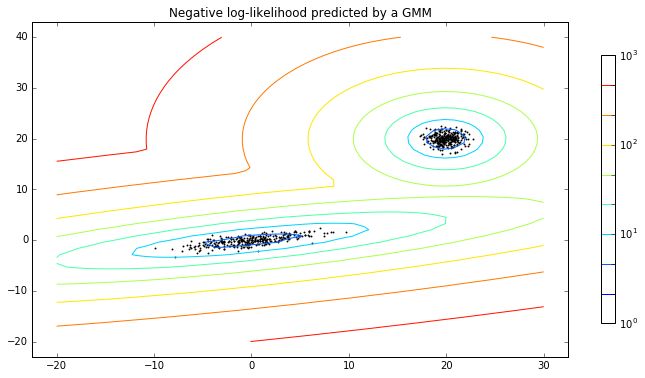

In [13]:
plt.figure(figsize=(12,6))
CS = plt.contour(X, Y, Z, norm = LogNorm(vmin = 1.0, vmax = 1000.0), 
                 levels = np.logspace(0,3,10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)
plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()